In [2]:
pip install autots


Note: you may need to restart the kernel to use updated packages.


In [3]:
from autots import AutoTS, load_daily
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [4]:
import pandas as pd
ts_ms = pd.date_range(start = '2023-03-10 23:13:20',     # 날짜 범위 시작
                     end = None,                # 날짜 범위 끝
                     periods = 19304,               # 생성할 Timestamp 개수
                     freq = 'T',               # 시간 간격(MS : 월의 시작일)
                     tz = 'Asia/Seoul')         # 시간대(timezone)
print(ts_ms)

DatetimeIndex(['2023-03-10 23:13:20+09:00', '2023-03-10 23:14:20+09:00',
               '2023-03-10 23:15:20+09:00', '2023-03-10 23:16:20+09:00',
               '2023-03-10 23:17:20+09:00', '2023-03-10 23:18:20+09:00',
               '2023-03-10 23:19:20+09:00', '2023-03-10 23:20:20+09:00',
               '2023-03-10 23:21:20+09:00', '2023-03-10 23:22:20+09:00',
               ...
               '2023-03-24 08:47:20+09:00', '2023-03-24 08:48:20+09:00',
               '2023-03-24 08:49:20+09:00', '2023-03-24 08:50:20+09:00',
               '2023-03-24 08:51:20+09:00', '2023-03-24 08:52:20+09:00',
               '2023-03-24 08:53:20+09:00', '2023-03-24 08:54:20+09:00',
               '2023-03-24 08:55:20+09:00', '2023-03-24 08:56:20+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', length=19304, freq='T')


In [5]:
long = False
df = pd.read_csv('/Users/sunflower/Korea/실험환경/python/data/cpu_memory_usage_v1.csv', header=0)
df = df.loc[df.pod_name == 'drive-az2-prd-69cbb999bc-lpr67']
df = df.loc[:,['index','time','cpu_usage_nanocores', 'memory_working_set_bytes']]
df = df.dropna()


ms = MinMaxScaler()

df[['cpu_usage_nanocores','memory_working_set_bytes']] = ms.fit_transform(df[['cpu_usage_nanocores','memory_working_set_bytes']])
df['time'] = ts_ms
df.set_index('time', inplace=True)
df

,index,cpu_usage_nanocores,memory_working_set_bytes
time,,,
2023-03-10 23:13:20+09:00,2,0.411576,0.044959
2023-03-10 23:14:20+09:00,18,0.481051,0.044911
2023-03-10 23:15:20+09:00,31,0.500366,0.049663
2023-03-10 23:16:20+09:00,39,0.441449,0.049532
2023-03-10 23:17:20+09:00,52,0.681631,0.050024
...,...,...,...
2023-03-24 08:52:20+09:00,231587,0.031644,0.066024
2023-03-24 08:53:20+09:00,231589,0.024549,0.066039
2023-03-24 08:54:20+09:00,231605,0.036685,0.066039


In [6]:

model = AutoTS(
    forecast_length=21,
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="fast",  # "superfast", "default", "fast_parallel"
    transformer_list="fast",  # "superfast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)

In [7]:

model = model.fit(
    df,
    date_col='time' if long else None,
    value_col='memory_working_set_bytes' if long else None,
    id_col='index' if long else None,
)


Inferred frequency is: T
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 4
Epoch 1/50


2023-04-05 21:17:54.835757: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


603/603 [==============================] - 3s 2ms/step - loss: 0.2778
Epoch 2/50
603/603 [==============================] - 1s 2ms/step - loss: 0.2209
Epoch 3/50
603/603 [==============================] - 1s 2ms/step - loss: 0.1593
Epoch 4/50
603/603 [==============================] - 1s 2ms/step - loss: 0.1477
Epoch 5/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1407
Epoch 6/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1367
Epoch 7/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1279
Epoch 8/50
603/603 [==============================] - 1s 2ms/step - loss: 0.1221
Epoch 9/50
603/603 [==============================] - 1s 2ms/step - loss: 0.1159
Epoch 10/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1124
Epoch 11/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1080
Epoch 12/50
603/603 [==============================] - 1s 1ms/step - loss: 0.1074
Epoch 13/50
603/603 [===============

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 29 with model DatepartRegression in generation 0 of 4
Model Number: 30 with model ETS in generation 0 of 4
Model Number: 31 with model VECM in generation 0 of 4
Model Number: 32 with model MultivariateMotif in generation 0 of 4
Model Number: 33 with model MultivariateMotif in generation 0 of 4
Model Number: 34 with model UnivariateMotif in generation 0 of 4
Model Number: 35 with model UnivariateMotif in generation 0 of 4
Model Number: 36 with model SectionalMotif in generation 0 of 4
Model Number: 37 with model SectionalMotif in generation 0 of 4
Model Number: 38 with model SeasonalNaive in generation 0 of 4
Model Number: 39 with model DatepartRegression in generation 0 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Model Number: 40 with model NVAR in generation 0 of 4


[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 41 with model Cassandra in generation 0 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 42 with model ConstantNaive in generation 0 of 4
Model Number: 43 with model LastValueNaive in generation 0 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 43 in generation 0: LastValueNaive
Model Number: 44 with model AverageValueNaive in generation 0 of 4
Model Number: 45 with model GLS in generation 0 of 4
Model Number: 46 with model SeasonalNaive in generation 0 of 4
Model Number: 47 with model GLM in generation 0 of 4
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 47 in generation 0: GLM
Model Number: 48 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on index with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal compone

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 62 with model SeasonalityMotif in generation 0 of 4
Model Number: 63 with model MetricMotif in generation 0 of 4
Model Number: 64 with model ETS in generation 0 of 4
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 64 in generation 0: ETS
Model Number: 65 with model VECM in generation 0 of 4
Model Number: 66 with model MAR in generation 0 of 4
Template Eval Error: ValueError('Shape of passed values is (7, 3), indices imply (21, 3)') in model 66 in generation 0: MAR
Model Number: 67 with model GLS in generation 0 of 4
Model Number: 68 with model MAR in generation 0 of 4
Model Number: 69 with model ETS in generation 0 of 4
Model Number: 70 with model VECM in generation 0 of 4
Model Number: 71 with model SectionalMotif in generation 0 of 4
Model Number: 72 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nanocores wi

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:550: RuntimeWarning: invalid value encountered in divide
  avg = np.multiply(a, wgt,


Model Number: 84 with model SectionalMotif in generation 0 of 4
Model Number: 85 with model VAR in generation 0 of 4
Model Number: 86 with model MetricMotif in generation 0 of 4
Model Number: 87 with model WindowRegression in generation 0 of 4
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 87 in generation 0: WindowRegression
Model Number: 88 with model ETS in generation 0 of 4
Model Number: 89 with model WindowRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 89 in generation 0: WindowRegression
Model Number: 90 with model NVAR in generation 0 of 4


[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative


Model Number: 91 with model MetricMotif in generation 0 of 4
Model Number: 92 with model MetricMotif in generation 0 of 4
Model Number: 93 with model ConstantNaive in generation 0 of 4
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 93 in generation 0: ConstantNaive
Model Number: 94 with model ConstantNaive in generation 0 of 4
Model Number: 95 with model UnivariateMotif in generation 0 of 4
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 95 in generation 0: UnivariateMotif
Model Number: 96 with model LastValueNaive in generation 0 of 4
Model Number: 97 with model LastValueNaive in generation 0 of 4
Model Number: 98 with model RRVAR in generation 0 of 4
Model Number: 99 with model VAR in generation 0 of 4
Model Number: 100 with model VAR in generation 0 of 4
Model Number: 101 with model MAR in generation 0 of 4
Template Eval Error: ValueError('Shape of passed values 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 110 with model RRVAR in generation 0 of 4
Model Number: 111 with model WindowRegression in generation 0 of 4
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 111 in generation 0: WindowRegression
Model Number: 112 with model VECM in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 112 in generation 0: VECM
Model Number: 113 with model AverageValueNaive in generation 0 of 4
Model Number: 114 with model ConstantNaive in generation 0 of 4
Model Number: 115 with model SeasonalityMotif in generation 0 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 115 in generation 0: SeasonalityMotif
Model Number: 116 with model SeasonalityMotif in generation 0 of 4


[LightGBM] [Fatal] [gamma]: at least one target label is negative
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 116 in generation 0: SeasonalityMotif
Model Number: 117 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nanocores with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on memory_working_set_bytes with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 118 with model LastValueNaive in generation 0 of 4
Model Number: 119 with model NVAR in generation 0 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 119 in generation 0: NVAR
Model Number: 120 with model LastValueNaive in generation 0 of 4
Model Nu

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 141 with model VECM in generation 0 of 4
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 141 in generation 0: VECM
Model Number: 142 with model NVAR in generation 0 of 4
Model Number: 143 with model KalmanStateSpace in generation 0 of 4
Model Number: 144 with model DatepartRegression in generation 0 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 144 in generation 0: DatepartRegression
Model Number: 145 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nanocores with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on memory_working_set_bytes with ValueError('endog must be strictly positive when usin

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 168 with model GLM in generation 1 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 169 with model WindowRegression in generation 1 of 4
Model Number: 170 with model GLS in generation 1 of 4
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 170 in generation 1: GLS
Model Number: 171 with model DatepartRegression in generation 1 of 4
Model Number: 172 with model VAR in generation 1 of 4
Model Number: 173 with model MetricMotif in generation 1 of 4
Model Number: 174 with model SeasonalNaive in generation 1 of 4
Model Number: 175 with model UnivariateMotif in generation 1 of 4
Model Number: 176 with model UnivariateMotif in generation 1 of 4
Model Number: 177 with model VECM in generation 1 of 4
Model Number: 178 with model SeasonalityMotif in generation 1 of 4
Model Number: 179 with model Cassandra in generation 1 of 4
Model Number: 180 with model SeasonalNaive in generation 1 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 181 with model VAR in generation 1 of 4
Model Number: 182 with model SeasonalNaive in generation 1 of 4
Model Number: 183 with model DatepartRegression in generation 1 of 4
Model Number: 184 with model AverageValueNaive in generation 1 of 4
Model Number: 185 with model AverageValueNaive in generation 1 of 4
Model Number: 186 with model KalmanStateSpace in generation 1 of 4
Model Number: 187 with model NVAR in generation 1 of 4
Model Number: 188 with model NVAR in generation 1 of 4
Model Number: 189 with model LastValueNaive in generation 1 of 4
Model Number: 190 with model VECM in generation 1 of 4
Model Number: 191 with model SeasonalNaive in generation 1 of 4
Model Number: 192 with model UnivariateMotif in generation 1 of 4
Model Number: 193 with model NVAR in generation 1 of 4
Model Number: 194 with model MetricMotif in generation 1 of 4
Model Number: 195 with model SeasonalNaive in generation 1 of 4
Model Number: 196 with model ETS in generation 1 of 4
ETS error Value

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 216 with model MetricMotif in generation 1 of 4
Model Number: 217 with model SectionalMotif in generation 1 of 4
Model Number: 218 with model NVAR in generation 1 of 4
Model Number: 219 with model VAR in generation 1 of 4
Model Number: 220 with model SeasonalityMotif in generation 1 of 4
Model Number: 221 with model ETS in generation 1 of 4
Model Number: 222 with model GLS in generation 1 of 4
Model Number: 223 with model MAR in generation 1 of 4
Template Eval Error: ValueError('Shape of passed values is (14, 3), indices imply (21, 3)') in model 223 in generation 1: MAR
Model Number: 224 with model LastValueNaive in generation 1 of 4
Model Number: 225 with model DatepartRegression in generation 1 of 4
Model Number: 226 with model GLS in generation 1 of 4
Model Number: 227 with model VECM in generation 1 of 4
Model Number: 228 with model UnivariateMotif in generation 1 of 4
Model Number: 229 with model MultivariateMotif in generation 1 of 4
Model Number: 230 with model NVA

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 244 with model AverageValueNaive in generation 1 of 4
Model Number: 245 with model MetricMotif in generation 1 of 4
Model Number: 246 with model WindowRegression in generation 1 of 4
Model Number: 247 with model SeasonalityMotif in generation 1 of 4
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 247 in generation 1: SeasonalityMotif
Model Number: 248 with model MultivariateMotif in generation 1 of 4
Model Number: 249 with model VAR in generation 1 of 4
Model Number: 250 with model AverageValueNaive in generation 1 of 4
Model Number: 251 with model AverageValueNaive in generation 1 of 4
New Generation: 2 of 4
Model Number: 252 with model SeasonalNaive in generation 2 of 4
Model Number: 253 with model LastValueNaive in generation 2 of 4
Model Number: 254 with model SeasonalityMotif in generation 2 of 4
Model Number: 255 with model GLS in generation 2 of 4
Model Number: 256 with model LastValueNaive in generation 2 of 4

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 277 with model MAR in generation 2 of 4
Model Number: 278 with model MetricMotif in generation 2 of 4
Model Number: 279 with model NVAR in generation 2 of 4
Model Number: 280 with model ETS in generation 2 of 4
Model Number: 281 with model UnivariateMotif in generation 2 of 4
Model Number: 282 with model MultivariateMotif in generation 2 of 4
Model Number: 283 with model ETS in generation 2 of 4
Model Number: 284 with model SectionalMotif in generation 2 of 4
Model Number: 285 with model DatepartRegression in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 286 with model VAR in generation 2 of 4
Model Number: 287 with model VAR in generation 2 of 4
Model Number: 288 with model GLS in generation 2 of 4
Model Number: 289 with model UnivariateMotif in generation 2 of 4
Model Number: 290 with model SeasonalityMotif in generation 2 of 4
Template Eval Error: TypeError('Cannot subtract tz-naive and tz-aware datetime-like objects') in model 290 in generation 2: SeasonalityMotif
Model Number: 291 with model AverageValueNaive in generation 2 of 4
Model Number: 292 with model SectionalMotif in generation 2 of 4
Model Number: 293 with model SectionalMotif in generation 2 of 4
Model Number: 294 with model KalmanStateSpace in generation 2 of 4
Model Number: 295 with model MultivariateMotif in generation 2 of 4
Model Number: 296 with model VAR in generation 2 of 4
Model Number: 297 with model SeasonalityMotif in generation 2 of 4
Model Number: 298 with model WindowRegression in generation 2 of 4
Model Number: 299 with model GLM in generat

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 318 with model NVAR in generation 2 of 4
Model Number: 319 with model DatepartRegression in generation 2 of 4
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 319 in generation 2: DatepartRegression
Model Number: 320 with model AverageValueNaive in generation 2 of 4
Model Number: 321 with model UnivariateMotif in generation 2 of 4
Model Number: 322 with model SeasonalNaive in generation 2 of 4
Model Number: 323 with model VAR in generation 2 of 4
Model Number: 324 with model MetricMotif in generation 2 of 4
Model Number: 325 with model MetricMotif in generation 2 of 4
Model Number: 326 with model DatepartRegression in generation 2 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 327 with model RRVAR in generation 2 of 4
Model Number: 328 with model SectionalMotif in generation 2 of 4
Model Number: 329 with model LastValueNaive in generation 2 of 4
Model Number: 330 with model SeasonalityMotif in generation 2 of 4
Model Number: 331 with model ConstantNaive in generation 2 of 4
Model Number: 332 with model SeasonalityMotif in generation 2 of 4
Model Number: 333 with model SectionalMotif in generation 2 of 4
Model Number: 334 with model GLS in generation 2 of 4
Model Number: 335 with model AverageValueNaive in generation 2 of 4
Model Number: 336 with model ETS in generation 2 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on index with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nan

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2112e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 353 with model VECM in generation 2 of 4
Model Number: 354 with model MetricMotif in generation 2 of 4
Model Number: 355 with model KalmanStateSpace in generation 2 of 4
Model Number: 356 with model VECM in generation 2 of 4
New Generation: 3 of 4
Model Number: 357 with model ETS in generation 3 of 4
Model Number: 358 with model MultivariateMotif in generation 3 of 4
Model Number: 359 with model WindowRegression in generation 3 of 4
Model Number: 360 with model DatepartRegression in generation 3 of 4
Model Number: 361 with model SeasonalityMotif in generation 3 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 362 with model VECM in generation 3 of 4
Model Number: 363 with model SectionalMotif in generation 3 of 4
Model Number: 364 with model LastValueNaive in generation 3 of 4
Model Number: 365 with model RRVAR in generation 3 of 4
Model Number: 366 with model ETS in generation 3 of 4
Model Number: 367 with model SectionalMotif in generation 3 of 4
Model Number: 368 with model KalmanStateSpace in generation 3 of 4
Model Number: 369 with model KalmanStateSpace in generation 3 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/fast_kalman.py:853: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/fast_kalman.py:853: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/fast_kalman.py:863: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/fast_kalman.py:735: RuntimeWarning: invalid value encountered in add
  douter(err, err)


Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 369 in generation 3: KalmanStateSpace
Model Number: 370 with model MetricMotif in generation 3 of 4
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 370 in generation 3: MetricMotif
Model Number: 371 with model AverageValueNaive in generation 3 of 4
Model Number: 372 with model UnivariateMotif in generation 3 of 4
Model Number: 373 with model SectionalMotif in generation 3 of 4
Model Number: 374 with model UnivariateMotif in generation 3 of 4
Model Number: 375 with model VECM in generation 3 of 4
Model Number: 376 with model ETS in generation 3 of 4
Model Number: 377 with model SeasonalNaive in generation 3 of 4
Model Number: 378 with model KalmanStateSpace in generation 3 of 4
Model Number: 379 with model SectionalMotif in generation 3 of 4
Model Number: 380 with model MetricMotif in generation 3 of 4
Model Number: 381 with model SeasonalNaive in generation 3 of 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/transform.py:3064: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 387 with model LastValueNaive in generation 3 of 4
Model Number: 388 with model MetricMotif in generation 3 of 4
Model Number: 389 with model VECM in generation 3 of 4
Model Number: 390 with model MetricMotif in generation 3 of 4
Model Number: 391 with model RRVAR in generation 3 of 4
Model Number: 392 with model ConstantNaive in generation 3 of 4
Model Number: 393 with model SectionalMotif in generation 3 of 4
Model Number: 394 with model KalmanStateSpace in generation 3 of 4
Model Number: 395 with model ETS in generation 3 of 4
Model Number: 396 with model VECM in generation 3 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 396 in generation 3: VECM
Model Number: 397 with model GLM in generation 3 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 398 with model DatepartRegression in generation 3 of 4
Model Number: 399 with model UnivariateMotif in generation 3 of 4
Model Number: 400 with model MultivariateMotif in generation 3 of 4
Model Number: 401 with model NVAR in generation 3 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 402 with model VAR in generation 3 of 4
Model Number: 403 with model VAR in generation 3 of 4
Model Number: 404 with model SeasonalNaive in generation 3 of 4
Model Number: 405 with model MAR in generation 3 of 4
Model Number: 406 with model DatepartRegression in generation 3 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 407 with model KalmanStateSpace in generation 3 of 4
Model Number: 408 with model WindowRegression in generation 3 of 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
Model Number: 409 with model NVAR in generation 3 of 4
Model Number: 410 with model ETS in generation 3 of 4
Model Number: 411 with model MultivariateMotif in generation 3 of 4
Model Number: 412 with model SeasonalNaive in generation 3 of 4
Model Number: 413 with model MetricMotif in generation 3 of 4
Model Number: 414 with model AverageValueNaive in generation 3 of 4
Model Number: 415 with model DatepartRegression in generation 3 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 416 with model RRVAR in generation 3 of 4
Model Number: 417 with model MetricMotif in generation 3 of 4
Model Number: 418 with model GLS in generation 3 of 4
Model Number: 419 with model NVAR in generation 3 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 419 in generation 3: NVAR
Model Number: 420 with model MetricMotif in generation 3 of 4
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 420 in generation 3: MetricMotif
Model Number: 421 with model ETS in generation 3 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on index with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nanocores with ValueError('endog must be strictly positive wh

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Model Number: 440 with model KalmanStateSpace in generation 3 of 4
Model Number: 441 with model ETS in generation 3 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on index with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on cpu_usage_nanocores with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on memory_working_set_bytes with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 442 with model GLS in generation 3 of 4
Model Number: 443 with model NVAR in generation 3 of 4
Model Number: 444 with mod

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 457 with model ETS in generation 3 of 4
Model Number: 458 with model Cassandra in generation 3 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 459 with model GLS in generation 3 of 4
Model Number: 460 with model VECM in generation 3 of 4
Model Number: 461 with model VECM in generation 3 of 4
New Generation: 4 of 4
Model Number: 462 with model RRVAR in generation 4 of 4
Model Number: 463 with model GLS in generation 4 of 4
Model Number: 464 with model SeasonalNaive in generation 4 of 4
Model Number: 465 with model VAR in generation 4 of 4
Model Number: 466 with model MultivariateMotif in generation 4 of 4
Model Number: 467 with model LastValueNaive in generation 4 of 4
Model Number: 468 with model VECM in generation 4 of 4
Model Number: 469 with model WindowRegression in generation 4 of 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005707 seconds.
You can set `force_col_wise=true` to remove the overhead.
Model Number: 470 with model MetricMotif in generation 4 of 4
Model Number: 471 with model VECM in generation 4 of 4
Model Number: 472 with model MAR in generation 4

/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 482 with model VECM in generation 4 of 4
Model Number: 483 with model UnivariateMotif in generation 4 of 4
Model Number: 484 with model Cassandra in generation 4 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


Model Number: 485 with model KalmanStateSpace in generation 4 of 4
Model Number: 486 with model MAR in generation 4 of 4
Model Number: 487 with model KalmanStateSpace in generation 4 of 4
Model Number: 488 with model MetricMotif in generation 4 of 4
Model Number: 489 with model GLS in generation 4 of 4
Model Number: 490 with model VAR in generation 4 of 4
Model Number: 491 with model UnivariateMotif in generation 4 of 4
Model Number: 492 with model ETS in generation 4 of 4
Model Number: 493 with model NVAR in generation 4 of 4
Model Number: 494 with model WindowRegression in generation 4 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 494 in generation 4: WindowRegression
Model Number: 495 with model LastValueNaive in generation 4 of 4
Model Number: 496 with model ETS in generation 4 of 4
Model Number: 497 with model WindowRegression in generation 4 of 4
Model Number: 498 with model SeasonalNaive in generation 4 of 4
Model Number: 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 552 with model UnivariateMotif in generation 4 of 4
Model Number: 553 with model AverageValueNaive in generation 4 of 4
Model Number: 554 with model KalmanStateSpace in generation 4 of 4
Model Number: 555 with model VAR in generation 4 of 4
Model Number: 556 with model SectionalMotif in generation 4 of 4
Model Number: 557 with model MAR in generation 4 of 4
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 557 in generation 4: MAR
Model Number: 558 with model MAR in generation 4 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/transform.py:3064: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Template Eval Error: ValueError('Shape of passed values is (14, 3), indices imply (21, 3)') in model 558 in generation 4: MAR
Model Number: 559 with model MetricMotif in generation 4 of 4
Model Number: 560 with model SectionalMotif in generation 4 of 4
Model Number: 561 with model NVAR in generation 4 of 4
Model Number: 562 with model NVAR in generation 4 of 4
Model Number: 563 with model WindowRegression in generation 4 of 4
Model Number: 564 with model DatepartRegression in generation 4 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 565 with model GLS in generation 4 of 4


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 566 with model WindowRegression in generation 4 of 4
Validation Round: 1
Model Number: 1 of 85 with model VAR for Validation 1
📈 1 - VAR with avg smape 20.88: 
Model Number: 2 of 85 with model UnivariateMotif for Validation 1
2 - UnivariateMotif with avg smape 24.11: 
Model Number: 3 of 85 with model SectionalMotif for Validation 1
3 - SectionalMotif with avg smape 43.89: 
Model Number: 4 of 85 with model SectionalMotif for Validation 1
4 - SectionalMotif with avg smape 67.05: 
Model Number: 5 of 85 with model VAR for Validation 1
📈 5 - VAR with avg smape 17.32: 
Model Number: 6 of 85 with model VAR for Validation 1
6 - VAR with avg smape 20.75: 
Model Number: 7 of 85 with model VAR for Validation 1
7 - VAR with avg smape 17.54: 
Model Number: 8 of 85 with model VAR for Validation 1
📈 8 - VAR with avg smape 16.92: 
Model Number: 9 of 85 with model UnivariateMotif for Validation 1
9 - UnivariateMotif with avg smape 32.18: 
Model Number: 10 of 85 with model UnivariateMotif 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)



Model Number: 29 of 85 with model GLS for Validation 1
29 - GLS with avg smape 18.11: 
Model Number: 30 of 85 with model VECM for Validation 1
30 - VECM with avg smape 18.7: 
Model Number: 31 of 85 with model ETS for Validation 1
31 - ETS with avg smape 18.5: 
Model Number: 32 of 85 with model VECM for Validation 1
32 - VECM with avg smape 18.73: 
Model Number: 33 of 85 with model VECM for Validation 1
33 - VECM with avg smape 18.73: 
Model Number: 34 of 85 with model Cassandra for Validation 1
34 - Cassandra with avg smape 21.59: 
Model Number: 35 of 85 with model SeasonalNaive for Validation 1
35 - SeasonalNaive with avg smape 31.4: 
Model Number: 36 of 85 with model MetricMotif for Validation 1
36 - MetricMotif with avg smape 65.14: 
Model Number: 37 of 85 with model SeasonalNaive for Validation 1


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


37 - SeasonalNaive with avg smape 18.87: 
Model Number: 38 of 85 with model SeasonalNaive for Validation 1
38 - SeasonalNaive with avg smape 18.52: 
Model Number: 39 of 85 with model KalmanStateSpace for Validation 1
39 - KalmanStateSpace with avg smape 18.64: 
Model Number: 40 of 85 with model VECM for Validation 1
40 - VECM with avg smape 19.69: 
Model Number: 41 of 85 with model NVAR for Validation 1
41 - NVAR with avg smape 49.26: 
Model Number: 42 of 85 with model SeasonalNaive for Validation 1
42 - SeasonalNaive with avg smape 23.84: 
Model Number: 43 of 85 with model VECM for Validation 1
43 - VECM with avg smape 18.79: 
Model Number: 44 of 85 with model VECM for Validation 1
44 - VECM with avg smape 19.6: 
Model Number: 45 of 85 with model ETS for Validation 1
45 - ETS with avg smape 18.67: 
Model Number: 46 of 85 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on index with ValueError('Can only dampen the trend component')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


57 - DatepartRegression with avg smape 95.73: 
Model Number: 58 of 85 with model SeasonalityMotif for Validation 1
58 - SeasonalityMotif with avg smape 19.16: 
Model Number: 59 of 85 with model SeasonalityMotif for Validation 1
59 - SeasonalityMotif with avg smape 26.43: 
Model Number: 60 of 85 with model AverageValueNaive for Validation 1
60 - AverageValueNaive with avg smape 20.61: 
Model Number: 61 of 85 with model AverageValueNaive for Validation 1
61 - AverageValueNaive with avg smape 20.61: 
Model Number: 62 of 85 with model NVAR for Validation 1
62 - NVAR with avg smape 59.34: 
Model Number: 63 of 85 with model NVAR for Validation 1
63 - NVAR with avg smape 59.34: 
Model Number: 64 of 85 with model KalmanStateSpace for Validation 1
64 - KalmanStateSpace with avg smape 35.07: 
Model Number: 65 of 85 with model RRVAR for Validation 1
65 - RRVAR with avg smape 38.07: 
Model Number: 66 of 85 with model KalmanStateSpace for Validation 1
66 - KalmanStateSpace with avg smape 19.28: 
Mo

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


72 - DatepartRegression with avg smape 75.1: 
Model Number: 73 of 85 with model AverageValueNaive for Validation 1
73 - AverageValueNaive with avg smape 55.57: 
Model Number: 74 of 85 with model DatepartRegression for Validation 1
74 - DatepartRegression with avg smape 18.73: 
Model Number: 75 of 85 with model AverageValueNaive for Validation 1
75 - AverageValueNaive with avg smape 18.44: 
Model Number: 76 of 85 with model AverageValueNaive for Validation 1
76 - AverageValueNaive with avg smape 18.47: 
Model Number: 77 of 85 with model UnivariateMotif for Validation 1
77 - UnivariateMotif with avg smape 31.0: 
Model Number: 78 of 85 with model LastValueNaive for Validation 1
78 - LastValueNaive with avg smape 51.7: 
Model Number: 79 of 85 with model RRVAR for Validation 1
79 - RRVAR with avg smape 23.5: 
Model Number: 80 of 85 with model GLS for Validation 1
80 - GLS with avg smape 22.84: 
Model Number: 81 of 85 with model GLS for Validation 1
81 - GLS with avg smape 18.47: 
Model Numb

/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


29 - GLS with avg smape 24.98: 
Model Number: 30 of 85 with model VECM for Validation 2
30 - VECM with avg smape 18.58: 
Model Number: 31 of 85 with model ETS for Validation 2
31 - ETS with avg smape 20.83: 
Model Number: 32 of 85 with model VECM for Validation 2
32 - VECM with avg smape 18.57: 
Model Number: 33 of 85 with model VECM for Validation 2
33 - VECM with avg smape 18.57: 
Model Number: 34 of 85 with model Cassandra for Validation 2


/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()
/opt/homebrew/anaconda3/lib/python3.10/site-packages/autots/tools/holiday.py:40: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  USFederalHolidayCalendar()


34 - Cassandra with avg smape 30.59: 
Model Number: 35 of 85 with model SeasonalNaive for Validation 2
35 - SeasonalNaive with avg smape 22.52: 
Model Number: 36 of 85 with model MetricMotif for Validation 2
36 - MetricMotif with avg smape 64.41: 
Model Number: 37 of 85 with model SeasonalNaive for Validation 2
37 - SeasonalNaive with avg smape 19.0: 
Model Number: 38 of 85 with model SeasonalNaive for Validation 2
38 - SeasonalNaive with avg smape 19.15: 
Model Number: 39 of 85 with model KalmanStateSpace for Validation 2
39 - KalmanStateSpace with avg smape 20.09: 
Model Number: 40 of 85 with model VECM for Validation 2
40 - VECM with avg smape 18.77: 
Model Number: 41 of 85 with model NVAR for Validation 2
41 - NVAR with avg smape 51.68: 
Model Number: 42 of 85 with model SeasonalNaive for Validation 2
42 - SeasonalNaive with avg smape 29.65: 
Model Number: 43 of 85 with model VECM for Validation 2
43 - VECM with avg smape 19.09: 
Model Number: 44 of 85 with model VECM for Validatio

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


57 - DatepartRegression with avg smape 80.95: 
Model Number: 58 of 85 with model SeasonalityMotif for Validation 2
58 - SeasonalityMotif with avg smape 27.02: 
Model Number: 59 of 85 with model SeasonalityMotif for Validation 2
59 - SeasonalityMotif with avg smape 46.3: 
Model Number: 60 of 85 with model AverageValueNaive for Validation 2
60 - AverageValueNaive with avg smape 24.62: 
Model Number: 61 of 85 with model AverageValueNaive for Validation 2
61 - AverageValueNaive with avg smape 24.62: 
Model Number: 62 of 85 with model NVAR for Validation 2
62 - NVAR with avg smape 39.53: 
Model Number: 63 of 85 with model NVAR for Validation 2
63 - NVAR with avg smape 39.53: 
Model Number: 64 of 85 with model KalmanStateSpace for Validation 2
64 - KalmanStateSpace with avg smape 21.14: 
Model Number: 65 of 85 with model RRVAR for Validation 2
65 - RRVAR with avg smape 43.17: 
Model Number: 66 of 85 with model KalmanStateSpace for Validation 2
66 - KalmanStateSpace with avg smape 26.32: 
Mod

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


72 - DatepartRegression with avg smape 20.5: 
Model Number: 73 of 85 with model AverageValueNaive for Validation 2


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


73 - AverageValueNaive with avg smape 32.54: 
Model Number: 74 of 85 with model DatepartRegression for Validation 2
74 - DatepartRegression with avg smape 17.98: 
Model Number: 75 of 85 with model AverageValueNaive for Validation 2
75 - AverageValueNaive with avg smape 19.6: 
Model Number: 76 of 85 with model AverageValueNaive for Validation 2
76 - AverageValueNaive with avg smape 19.81: 
Model Number: 77 of 85 with model UnivariateMotif for Validation 2
77 - UnivariateMotif with avg smape 28.99: 
Model Number: 78 of 85 with model LastValueNaive for Validation 2
78 - LastValueNaive with avg smape 64.49: 
Model Number: 79 of 85 with model RRVAR for Validation 2
79 - RRVAR with avg smape 18.7: 
Model Number: 80 of 85 with model GLS for Validation 2
80 - GLS with avg smape 19.88: 
Model Number: 81 of 85 with model GLS for Validation 2
81 - GLS with avg smape 19.9: 
Model Number: 82 of 85 with model GLS for Validation 2
82 - GLS with avg smape 19.59: 
Model Number: 83 of 85 with model Cons

In [8]:
prediction = model.predict()

In [9]:
# Print the details of the best model
print(model)

# point forecasts dataframe
forecasts_df = prediction.forecast
# upper and lower forecasts
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

Initiated AutoTS object with best model: 
VAR
{'fillna': 'ffill', 'transformations': {'0': 'Detrend', '1': 'Slice', '2': 'Detrend', '3': 'PowerTransformer'}, 'transformation_params': {'0': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '1': {'method': 100}, '2': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '3': {}}}
{'regression_type': None, 'maxlags': None, 'ic': 'fpe'}
Validation: 0, 1, 2
SMAPE: 21.794508851625977, 20.88207983234744, 27.78917039390303
MAE: 0.011132831712955073, 0.009558508495510867, 0.015091078996275584
SPL: 0.48326727842250783, 0.7747416794380756, 0.8901335848902886


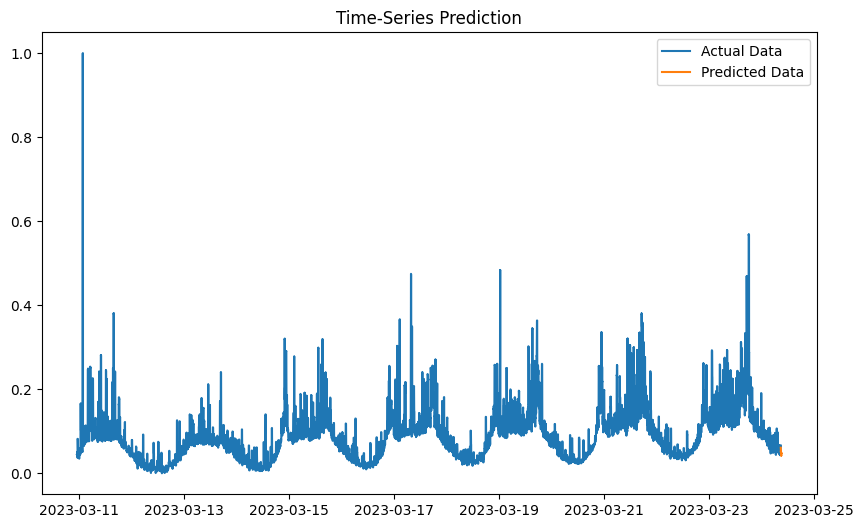

In [10]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) 

plt.plot(df['memory_working_set_bytes'], label='Actual Data') 
plt.plot(forecasts_df['memory_working_set_bytes'], label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [11]:
# accuracy of all tried model results
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("validation")

In [12]:
model_results

,ID,Model,ModelParameters,TransformationParameters,TransformationRuntime,FitRuntime,PredictRuntime,TotalRuntime,Ensemble,Exceptions,...,contour_weighted,maxe_weighted,oda_weighted,dwae_weighted,mqae_weighted,ewmae_weighted,uwmse_weighted,smoothness_weighted,TotalRuntimeSeconds,Score
0,5e75ed52611fa9266c855f5876eb8720,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""fake_date"", ""transformations"": {""0...",0 days 00:00:00.059699,0 days 00:00:00.000268,0 days 00:00:00.000384,0 days 00:00:00.063793,0,NaN,...,0.619048,3.144331,0.571429,7.223348,1.864582,8.110211,3.572932e+00,4.460458e-01,0.0638,8.493457e+02
1,32c21e08eec3d98d9158c35dfb4410ba,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0 days 00:00:00.012605,0 days 00:00:00.000341,0 days 00:00:00.000346,0 days 00:00:00.017165,0,NaN,...,0.301587,83.032736,0.190476,21.452938,33.927861,229.305895,1.019750e+03,0.000000e+00,0.0172,1.727609e+04
2,d8bd60351c03557d2b76a1f72be762ff,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""rolling_mean_24"", ""transformations...",0 days 00:00:00.005987,0 days 00:00:00.000289,0 days 00:00:00.000404,0 days 00:00:00.068339,0,NaN,...,0.761905,38640.074736,0.476190,11148.373400,38596.311390,154034.962601,8.908585e+08,1.047509e+00,0.0683,1.480421e+07
3,3c205c901c969cb3f2380ccc43f7a36f,DatepartRegression,"{""regression_model"": {""model"": ""DecisionTree"",...","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0 days 00:00:00.020250,0 days 00:00:00,0 days 00:00:00.021665,0 days 00:00:00.061839,0,NaN,...,0.301587,83.034788,0.190476,21.451259,33.927948,229.306650,1.019765e+03,4.809620e-05,0.0618,1.729126e+04
4,68a0c53e76c612a8e64a8b9057930f33,DatepartRegression,"{""regression_model"": {""model"": ""SVM"", ""model_p...","{""fillna"": ""zero"", ""transformations"": {""0"": ""C...",0 days 00:00:00.023473,0 days 00:00:00,0 days 00:00:00.373486,0 days 00:00:02.251592,0,NaN,...,0.682540,20.829017,0.730159,7.598311,18.399089,75.211917,2.065746e+02,1.568533e-08,2.2516,7.309831e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,61b4a63ef8b81f2ebb71235fdceeed45,GLS,{},"{""fillna"": ""KNNImputer"", ""transformations"": {""...",0 days 00:00:00.003614,0 days 00:00:00.001036,0 days 00:00:00.026976,0 days 00:00:00.037935,0,NaN,...,0.730159,2.023195,0.571429,6.537529,0.829969,4.488344,5.031496e-01,5.526677e-03,0.0379,4.923816e+02
732,670a3939cc2e606f2097651bd10a63ef,GLS,{},"{""fillna"": ""KNNImputer"", ""transformations"": {""...",0 days 00:00:00.002298,0 days 00:00:00.006586,0 days 00:00:00.014269,0 days 00:00:00.034867,0,NaN,...,0.619048,2.005879,0.619048,6.869830,0.832942,4.491945,5.073185e-01,1.429370e-07,0.0349,4.925608e+02
733,0ae16c0e713eb72400bff3d5ac2ceb19,ConstantNaive,"{""constant"": 0}","{""fillna"": ""time"", ""transformations"": {""0"": ""C...",0 days 00:00:00.018174,0 days 00:00:00.000025,0 days 00:00:00.000835,0 days 00:00:00.040120,0,NaN,...,0.666667,2.022299,0.444444,7.454772,0.830986,4.488584,5.031146e-01,9.411333e-09,0.0401,5.033770e+02
734,2b6cf34266ab010752652c0434112b80,MAR,"{""seasonality"": 4, ""family"": ""gamma"", ""maxiter...","{""fillna"": ""KNNImputer"", ""transformations"": {""...",0 days 00:00:00.051021,0 days 00:00:00.000073,0 days 00:00:04.534002,0 days 00:00:04.587664,0,NaN,...,0.650794,5.018501,0.873016,3.588963,1.340163,9.380358,2.856914e+00,6.280741e-01,4.5877,7.790602e+02


In [13]:
# after fitting an AutoTS model
example_filename = "autots_export_v1.csv"  # .csv/.json
model.export_template(example_filename, models='best',
                      n=15, max_per_model_class=3)

# on new training
# model = AutoTS(forecast_length=21,
#                frequency='infer', max_generations=0,
#                num_validations=0, verbose=0)
# model = model.import_template(example_filename, method='only') # method='add on'
# print("Overwrite template is: {}".format(str(model.initial_template)))